## 1. Import Data

In [122]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config Completer.use_jedi = False
%matplotlib inline

In [41]:
# Import data
current_path = os.getcwd()
df = pd.read_csv(os.getcwd() + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [74]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
# Check number of rows and columns
df.shape

(7043, 21)

In [44]:
# Check feature columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2. Dataset Information

In [45]:
# 3 features are numerical and the rest are objects
# TotalCharges seems to be numerical but is listed as an object, 
# therefore we convert to numeric
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [46]:
# The ValueError shows that some values contain a space
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [47]:
# Check to see which rows contain a space
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [48]:
# Dropping these 11 rows
df = df[df.TotalCharges != ' ']

In [49]:
# Again, convert TotalCharges to numeric data type
df.TotalCharges = pd.to_numeric(new_df.TotalCharges)

In [50]:
df.TotalCharges.dtypes

dtype('float64')

In [51]:
# Removing unnecessary features
df.drop(['customerID'], axis = 1, inplace = True)

In [52]:
# Final summary of dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [53]:
# statistical summary of churn data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [54]:
# Checking for null values
df.isnull().sum().sum()

0

## 3. Data Analysis

In [56]:
# Create categorical feature list:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [57]:
# Create numeric feature list:
numerical = (df.dtypes != "object")
numerical_list = list(numerical[numerical].index)

print("Categorical variables:")
print(numerical_list)

Categorical variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


#### 3.1 Categorical Variables

In [58]:
# function to generate bar plots for each categorical variable
def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    var_value = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))

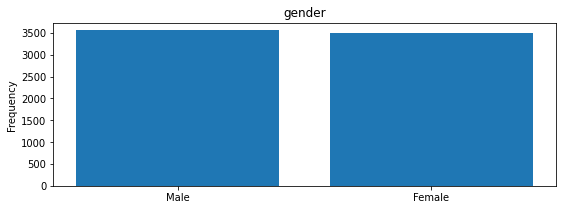

gender:
Male      3555
Female    3488
Name: gender, dtype: int64


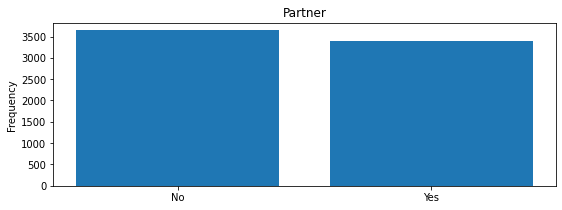

Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64


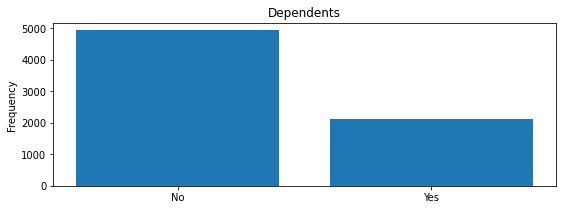

Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64


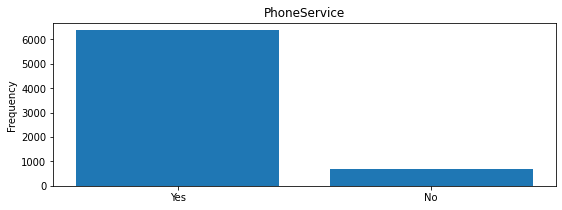

PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64


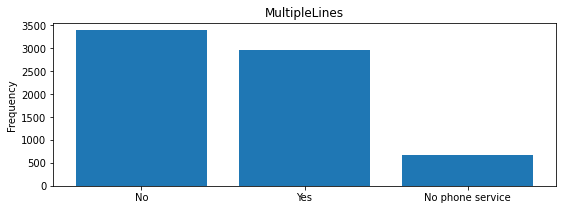

MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


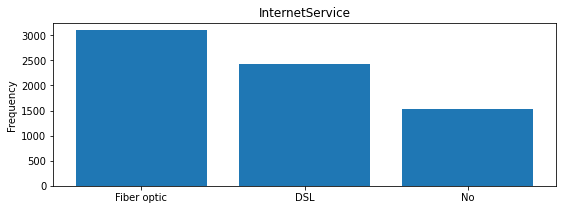

InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


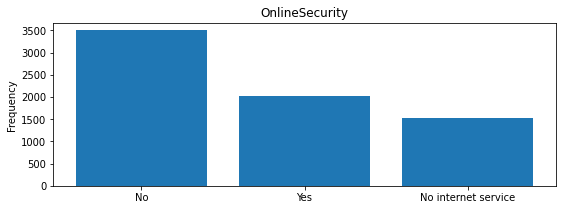

OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


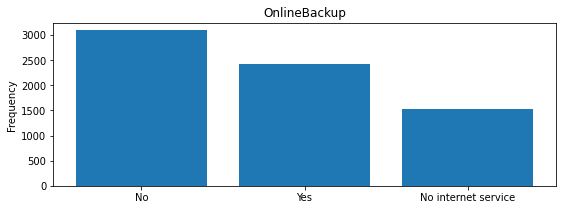

OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


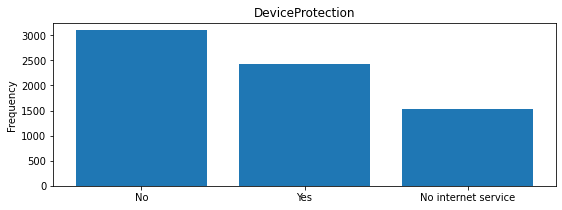

DeviceProtection:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


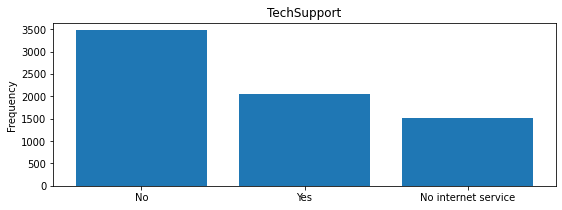

TechSupport:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


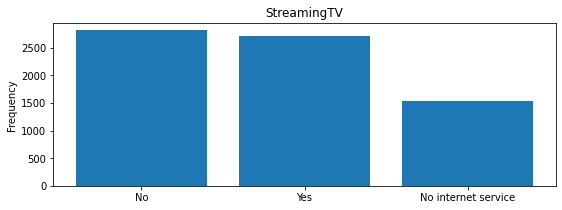

StreamingTV:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


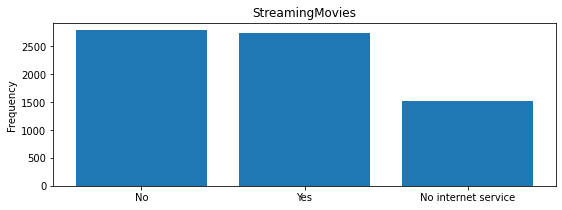

StreamingMovies:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


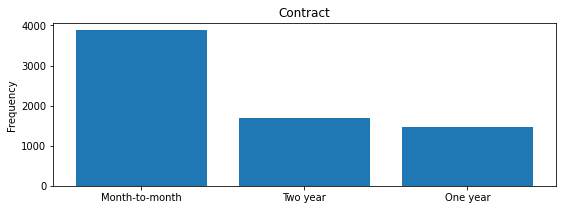

Contract:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


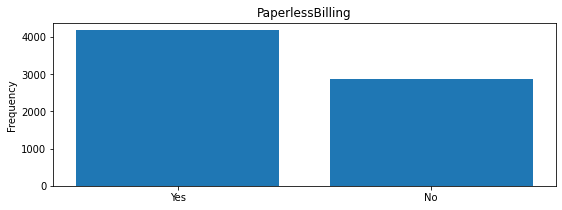

PaperlessBilling:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


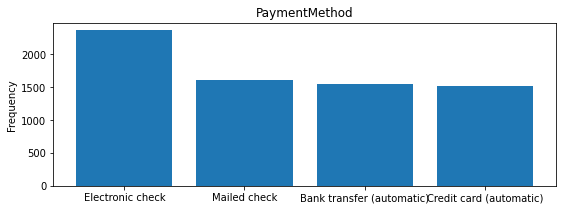

PaymentMethod:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


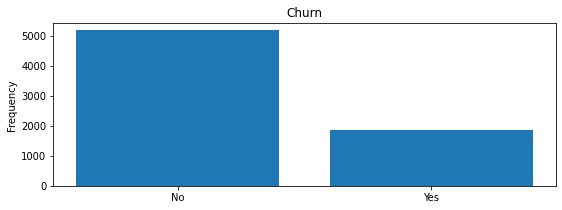

Churn:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [25]:
# Distribution of each categorical feature
for c in categorical_list:
    bar_plot(c)

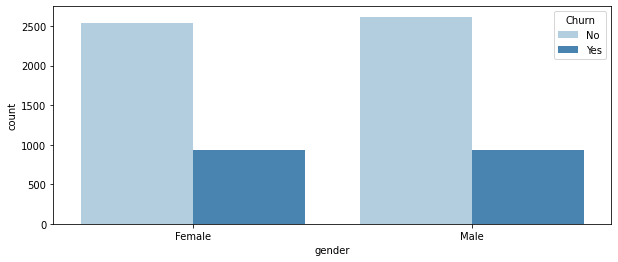

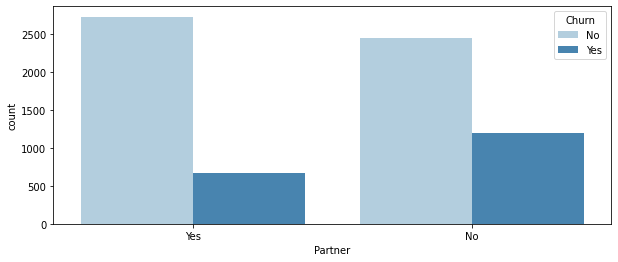

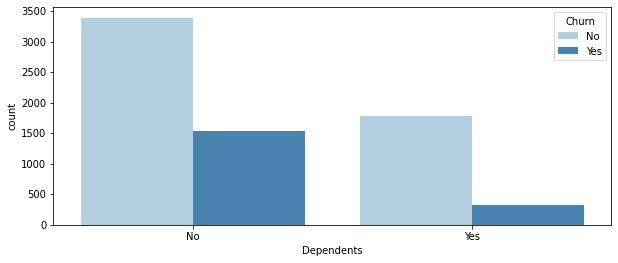

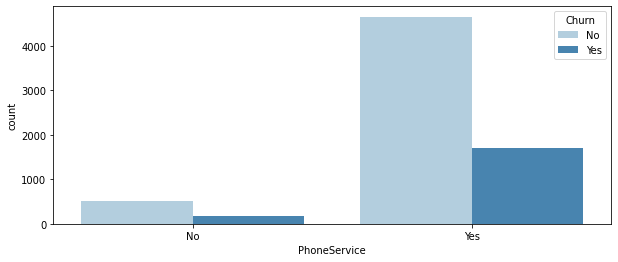

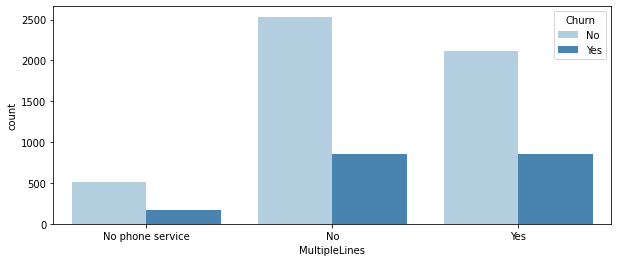

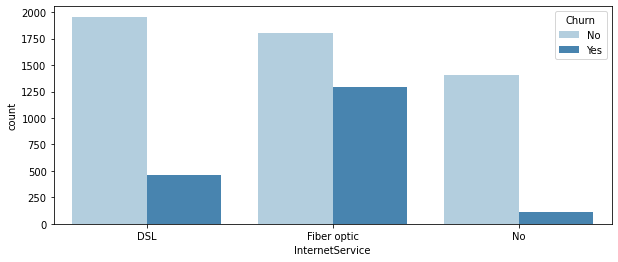

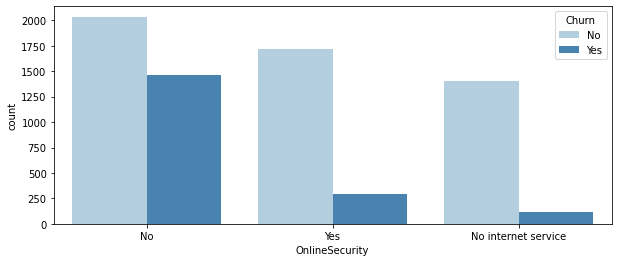

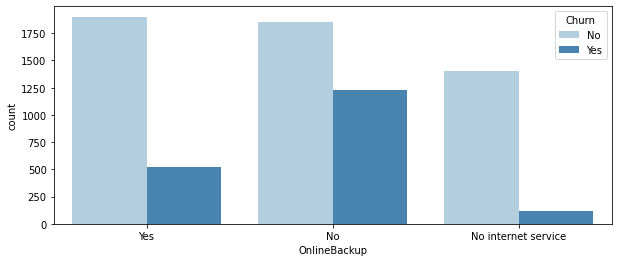

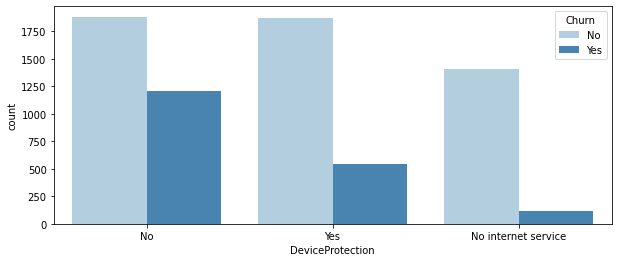

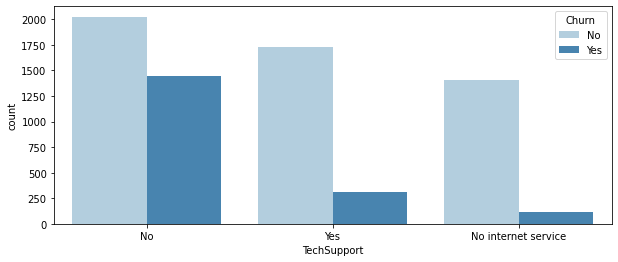

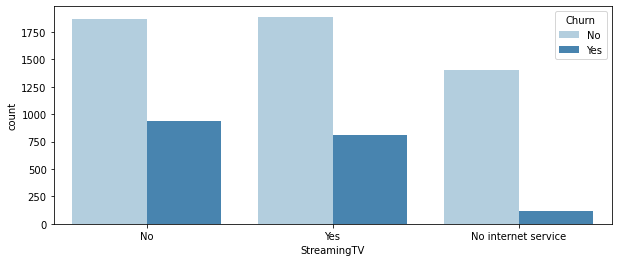

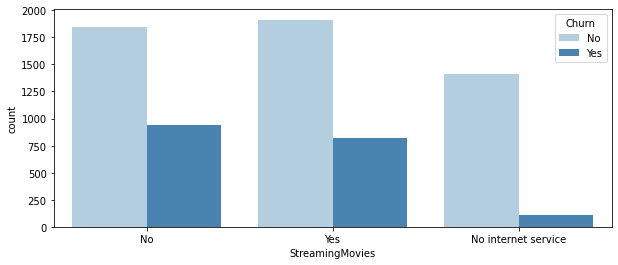

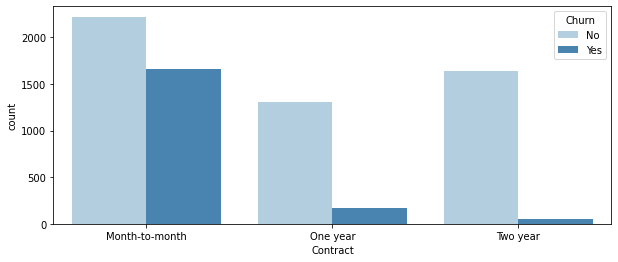

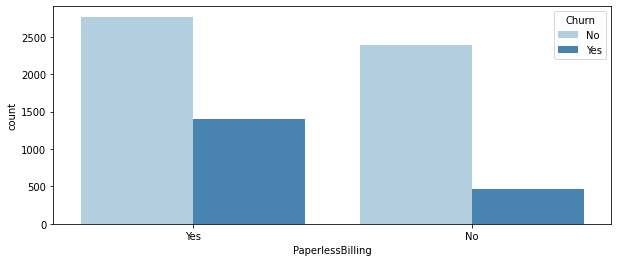

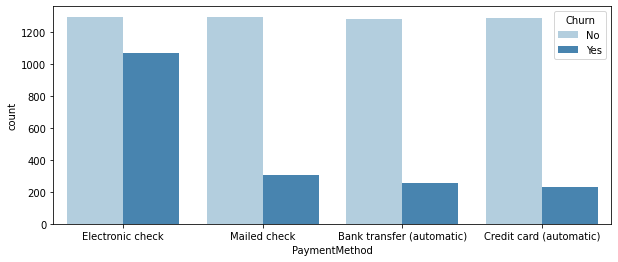

In [82]:
# Distribution of each feature wrt 'Churn'
for i in categorical_list:
    if i != 'Churn':
        plt.figure(figsize=(10,4))
        sns.countplot(x = i, hue = 'Churn', data=df, palette='Blues')
        plt.show()

#### 3.2 Numerical Variables

In [ ]:
# function to generate histogram plots for each numerical feature
def plot_hist(variable):
    plt.figure(figsize=(10,4))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [60]:
# list all integer data type features
numerical_int = (df.dtypes == 'int64')
numerical_int_list = list(numerical_int[numerical_int].index)

print("Numerical integer variables:")
print(numerical_int_list)

Numerical integer variables:
['SeniorCitizen', 'tenure']


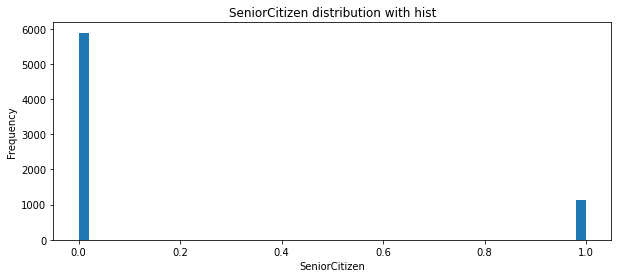

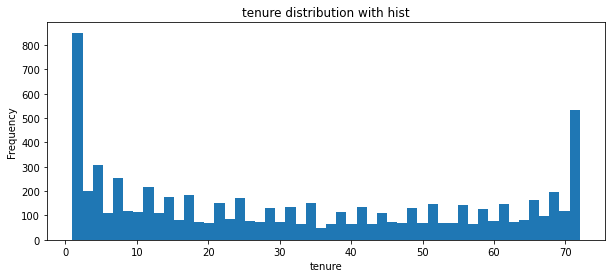

In [62]:
# plotting histograms for all integer variables
for n in numerical_int_list:
    plot_hist(n)

In [64]:
# list all float data type features
numerical_float64 = (df.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical float variables:")
print(numerical_float64_list)

Numerical float variables:
['MonthlyCharges', 'TotalCharges']


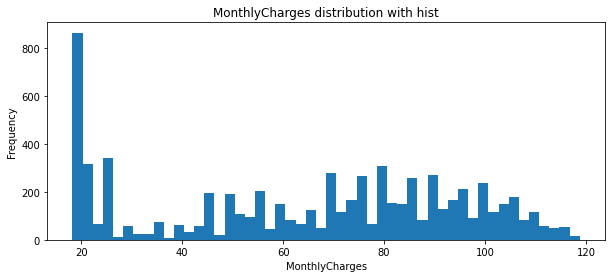

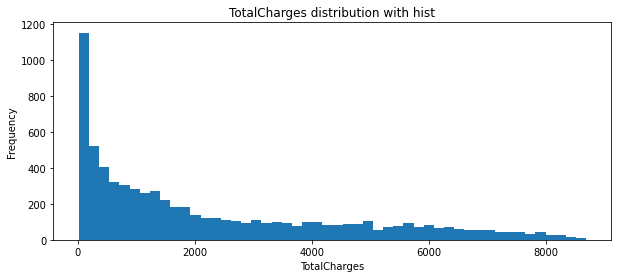

In [65]:
# plotting histograms for all float variables
for n in numerical_float64_list:
    plot_hist(n)

## 4. Data Visualisation

Text(0.5, 1.0, 'Tenure Interval and Counts')

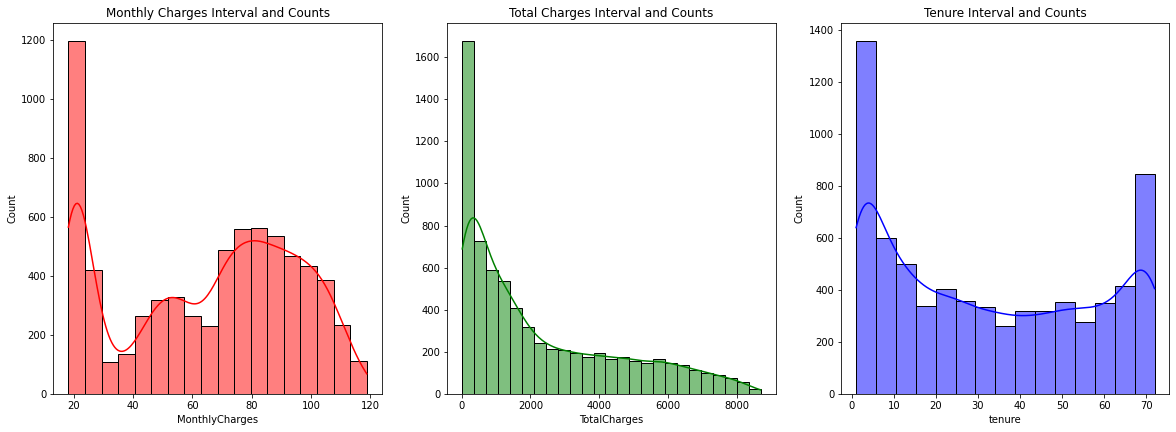

In [67]:
# Numerical values, value ranges and distributions

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.histplot(df['MonthlyCharges'], color='red', kde=True).set_title('Monthly Charges Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(df['TotalCharges'], color = 'green', kde = True).set_title('Total Charges Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(df['tenure'], color = 'blue', kde = True).set_title('Tenure Interval and Counts')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

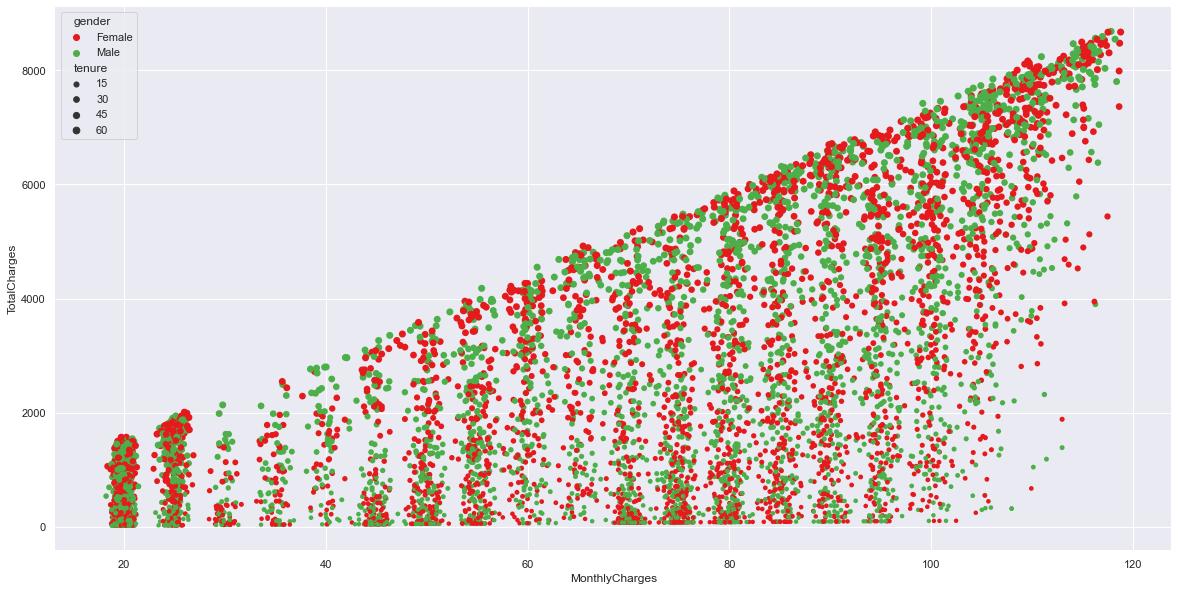

In [98]:
# plotting the relationship between TotalChargesa and MonthlyCharges with gender hue and
# point size determined by tenure

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20,10))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'],
                hue=df['gender'], 
                size="tenure",
                palette='Set1',
                hue_order=df['gender'],
                sizes=(20, 50), 
                linewidth=0,
                data=df)

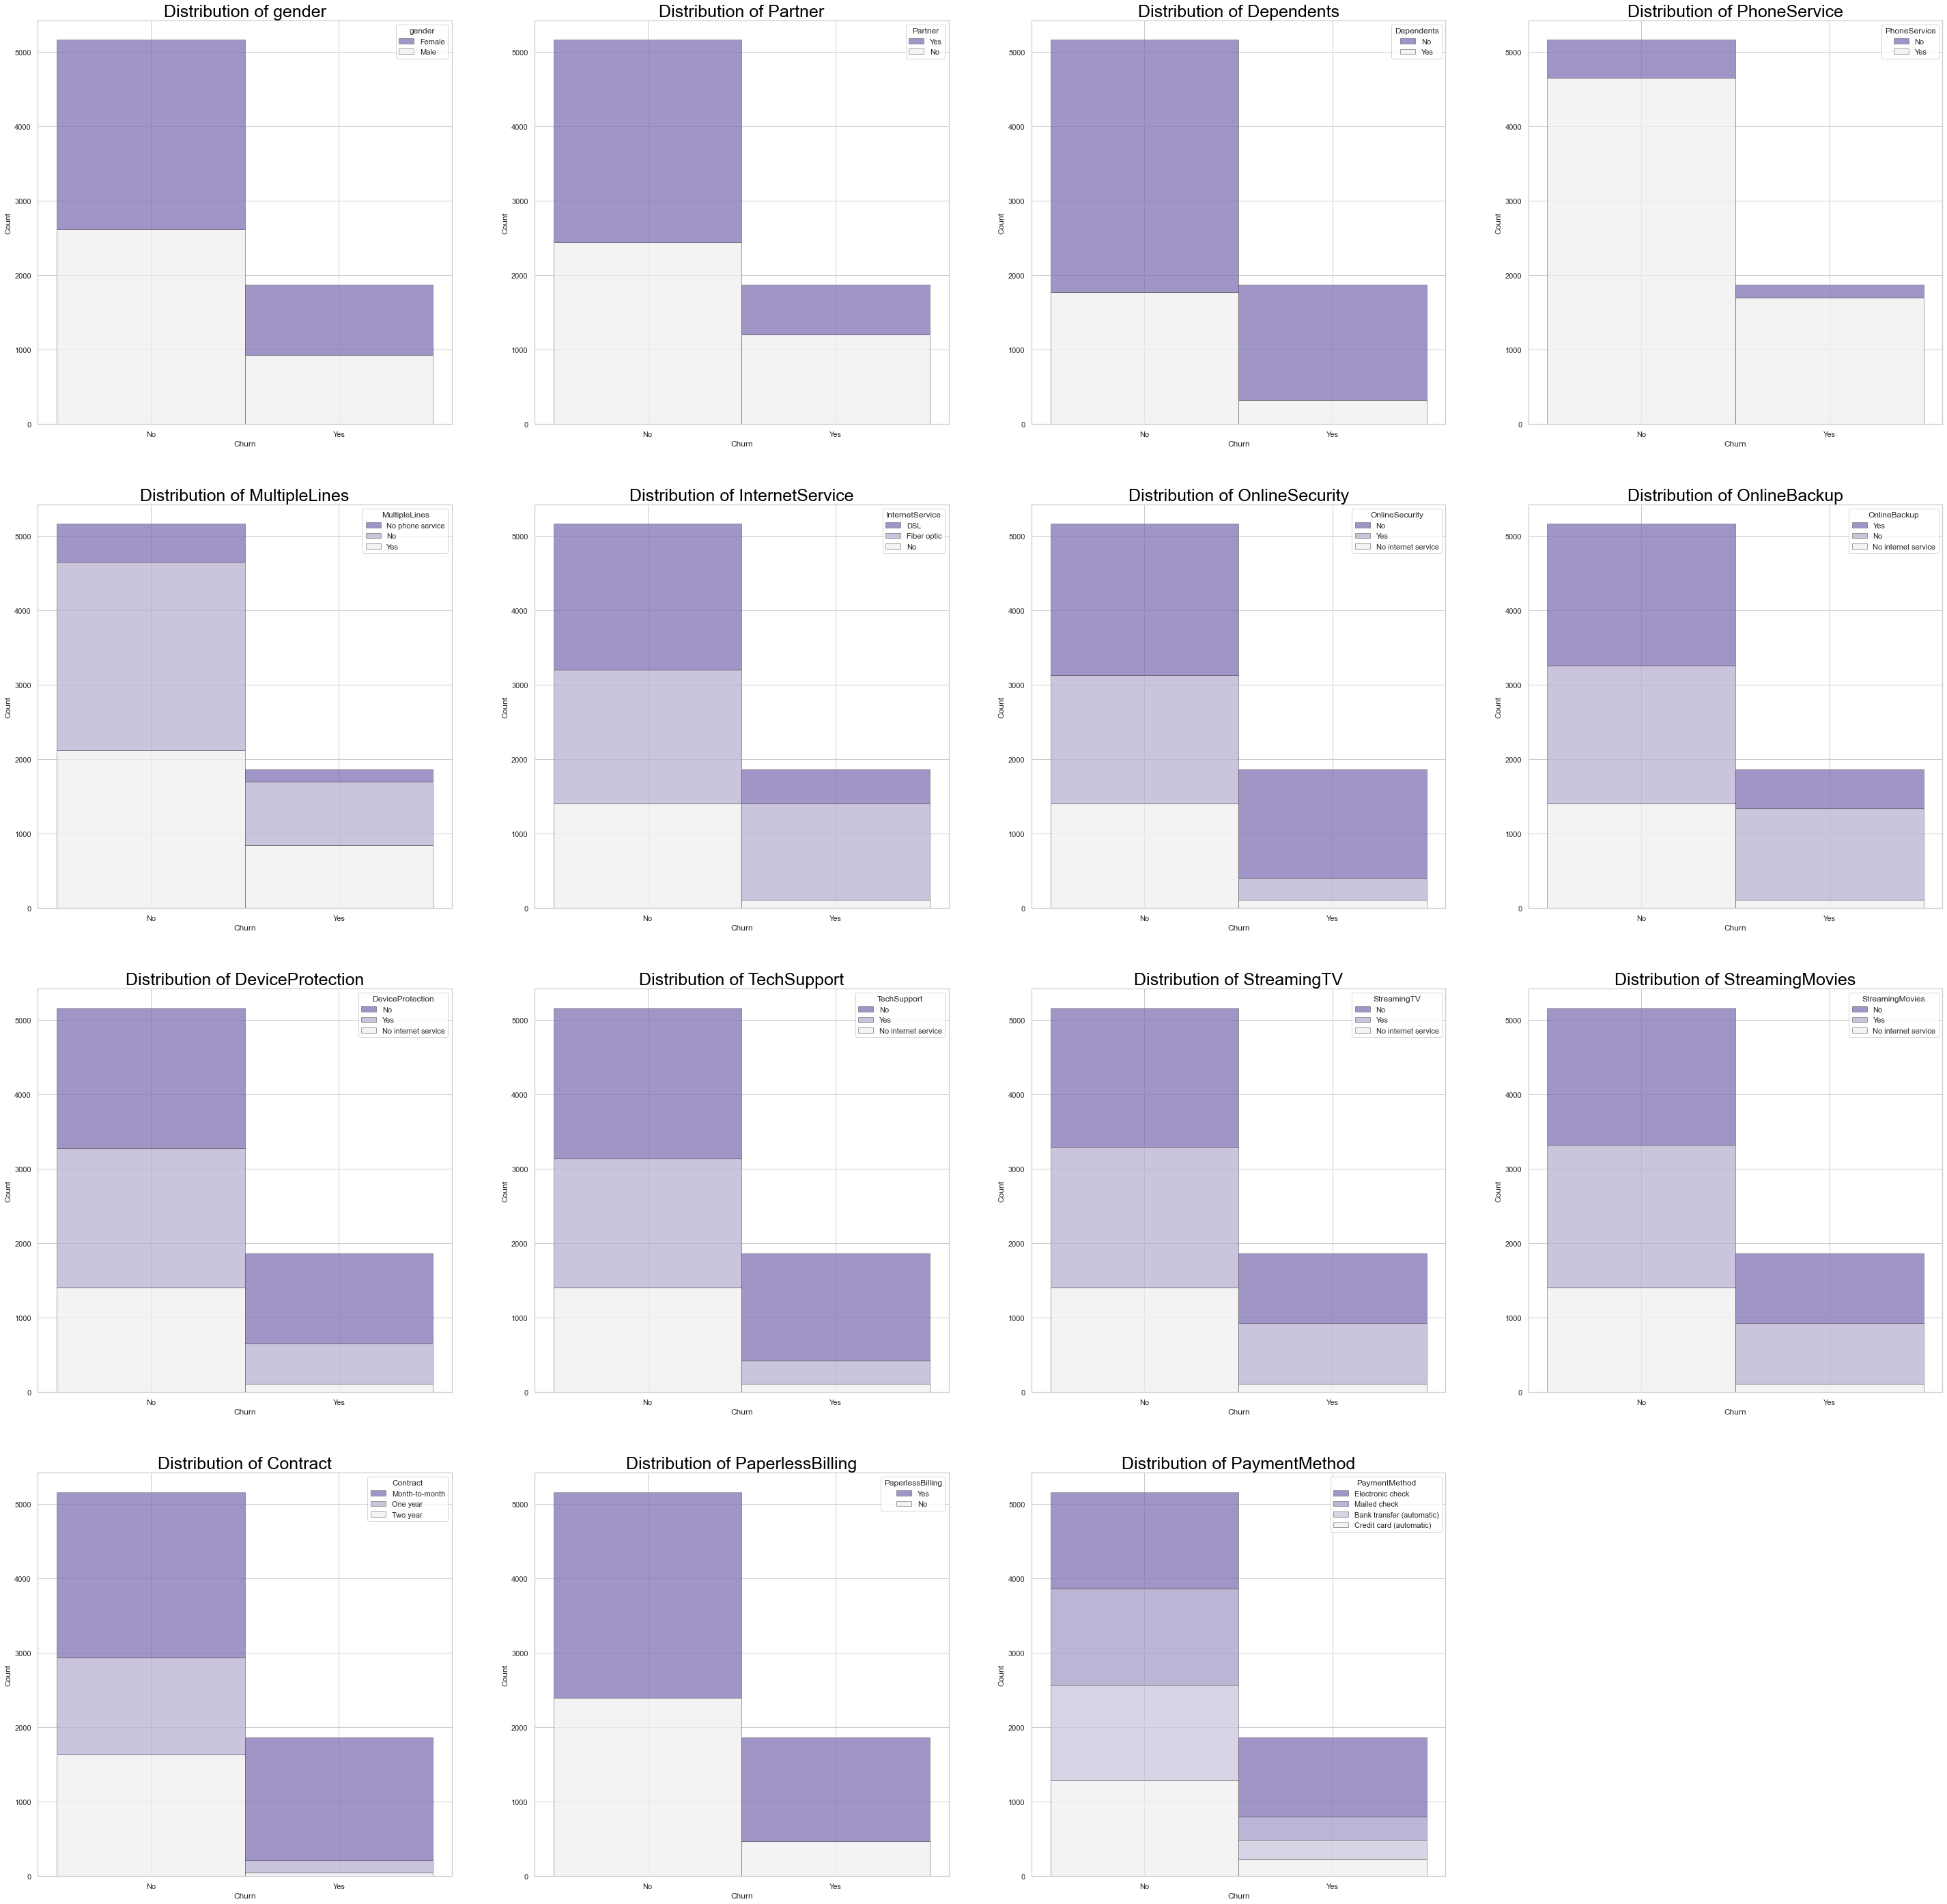

In [102]:
plt.figure(figsize=(50,50))
j=0
sns.set_theme(style='whitegrid')

# plotting stacked bar chart for each categorical variable

for i in categorical_list:
    plt.subplot(4,4,j+1)
    sns.histplot(df, x="Churn", hue=df[i], multiple="stack", palette="light:m_r",
                edgecolor=".3", linewidth=.5)
    plt.title(f'Distribution of {i}', color='black', fontsize=25)
    j+=1

## 5. Correlation

<AxesSubplot:>

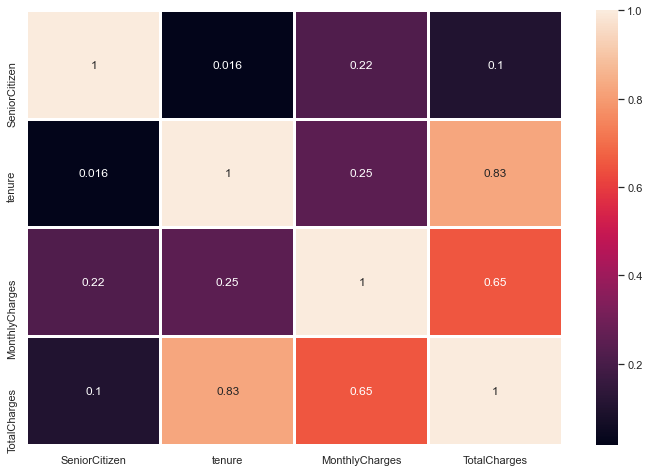

In [104]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=2)

There is a high correlation between 'tenure' and 'TotalCharges'.
There is also a correlation between 'MonthlyCharges and 'TotalCharges'

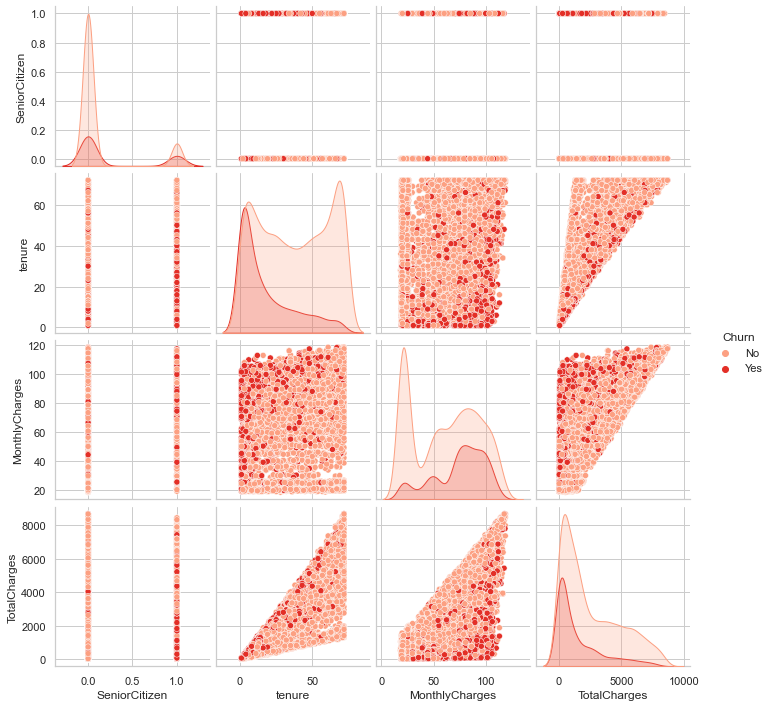

In [105]:
sns.pairplot(data = df,
            hue="Churn", palette='Reds')
plt.show()

## 6. Encoding

In [108]:
# Converting target "Churn" to integer
df['Churn'].replace({'No':0, 'Yes':1}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [109]:
# Converting categorical variables to integers using get_dummies
df_enc = pd.get_dummies(df)
df_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## 7. Train Test Split

In [112]:
features = df_enc.columns.drop('Churn')
label = ['Churn']

X = df_enc[features]
y = df_enc[label]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8. Pipelines & Parameter Optimisation

In [127]:
# Logistic Regression Classifier pipeline with GridSearchCV parameter optimisation
pipe_LR = make_pipeline(StandardScaler(), LogisticRegression())
param_grid_LR = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

grid_LR = GridSearchCV(pipe_LR, param_grid=param_grid_LR, cv=5, n_jobs=-1)
grid_LR.fit(X_train, y_train)

/Users/rajanrai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [133]:
# Random Forest Classifier pipeline with GridSearchCV parameter optimisation
pipe_RF = make_pipeline(RandomForestClassifier(n_estimators=100))
param_grid_RF = {'randomforestclassifier__max_features': [1, 2, 3 ,4 ,5, 6, 7, 8]}

grid_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=5, n_jobs=-1)
grid_RF.fit(X_train, y_train)

/Users/rajanrai/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': [1, 2, 3, 4, 5,
                                                                  6, 7, 8]})

In [139]:
# Support Vector Machine pipeline with GridSearchCV parameter optimisation
pipe_SVC = make_pipeline(SVC())
param_grid_SVC = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_SVC = GridSearchCV(pipe_SVC, param_grid=param_grid_SVC, cv=5, n_jobs=-1)
grid_SVC.fit(X_train, y_train)

/Users/rajanrai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC())]), n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [146]:
# K-means Neighbor Classifier pipeline with GridSearchCV parameter optimisation
pipe_KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid_KNN = {'kneighborsclassifier__n_neighbors': list(range(1, 50))}

grid_KNN = GridSearchCV(pipe_KNN, param_grid=param_grid_KNN, cv=5, n_jobs=-1)
grid_KNN.fit(X_train, y_train)

/Users/rajanrai/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30, ...]})

In [151]:
# Decision Tree Classifier pipeline with GridSearchCV parameter optimisation
pipe_DT = make_pipeline(DecisionTreeClassifier())
param_grid_DT = {'decisiontreeclassifier__max_features': [1, 2, 3 ,4 ,5, 6, 7, 8]}

grid_DT = GridSearchCV(pipe_DT, param_grid=param_grid_DT, cv=5, n_jobs=-1)
grid_DT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_features': [1, 2, 3, 4, 5,
                                                                  6, 7, 8]})

In [158]:
# Gradient Boosting Classifier pipeline with GridSearchCV parameter optimisation
pipe_GB = make_pipeline(GradientBoostingClassifier(n_estimators=100))
param_grid_GB = {'gradientboostingclassifier__max_features': [1, 2, 3 ,4 ,5, 6, 7, 8],
                'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]}

grid_GB = GridSearchCV(pipe_GB, param_grid=param_grid_GB, cv=5, n_jobs=-1)
grid_GB.fit(X_train, y_train)

/Users/rajanrai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.001,
                                                                       0.01,
                                                                       0.1, 0.2,
                                                                       0.3],
                         'gradientboostingclassifier__max_features': [1, 2, 3,
                                                                      4, 5, 6,
                                                                      7, 8]})

In [164]:
# Create lists of pipelines and parameter grids to loop through
pipelines = [pipe_LR, pipe_RF, pipe_SVC, pipe_KNN, pipe_DT, pipe_GB]
pipe_dict = {0: "LogisticRegression", 1: "RandomForestClassifier", 2: "SupportVectorMachine",
            3: "KNeighborsClassifier", 4: "DecisionTreeClassifier", 5: "GradientBoostingClassifier"}
param_grids = [param_grid_LR, param_grid_RF, param_grid_SVC, param_grid_KNN, param_grid_DT, param_grid_GB]

In [173]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [223]:
i = 0
train_scores = []
cross_val_scores = []
test_scores = []

# Looping through all estimators to determine train, validation and test scores
# as well the classification report for each estimator

for pipe, param_grid in zip(pipelines, param_grids):
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f'{pipe_dict[i]}')
    print('Train score of {}: {}'.format(pipe_dict[i], grid.score(X_train, y_train)*100))
    train_scores.append(grid.score(X_train, y_train)*100)
    
    print('Cross-Validation score of {}: {}'.format(pipe_dict[i], grid.best_score_*100))
    cross_val_scores.append(grid.best_score_*100)
    
    print('Test score of {}: {}'.format(pipe_dict[i], grid.score(X_test, y_test)*100))
    test_scores.append(grid.score(X_test, y_test)*100)
    print(" ")
    
    from sklearn.metrics import confusion_matrix
    y_pred = list(grid.predict(X_test))
    conf_matrix = confusion_matrix(y_pred, y_test)
    print('Confusion Matrix: \n{}\n'.format(conf_matrix))
    
    print('Classification Report: \n{}'.format(classification_report(y_pred, y_test)))
    print(" ")
    
    print("*****"*20)
    i+=1

LogisticRegression
Train score of LogisticRegression: 80.65826899634295
Cross-Validation score of LogisticRegression: 80.23187239486609
Test score of LogisticRegression: 79.478672985782
 
Confusion Matrix: 
[[1377  261]
 [ 172  300]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1638
           1       0.53      0.64      0.58       472

    accuracy                           0.79      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.81      0.79      0.80      2110

 
****************************************************************************************************
RandomForestClassifier
Train score of RandomForestClassifier: 99.83746444534742
Cross-Validation score of RandomForestClassifier: 79.13457967066981
Test score of RandomForestClassifier: 78.24644549763033
 
Confusion Matrix: 
[[1387  297]
 [ 162  264]]

Classification Report: 
              precision    recall 

In [246]:
# Table summary of train, validation and test scores
scores_table = pd.DataFrame({'Model':pipe_dict.values(), 'Train': train_scores, 
                              'Cross-Validation':cross_val_scores, 'Test': test_scores})

# Gradient Boosting Classifier produces the best cross-validation and test scores
scores_table

,Model,Train,Cross-Validation,Test
0,LogisticRegression,80.658269,80.231872,79.478673
1,RandomForestClassifier,99.837464,79.134580,78.246445
2,SupportVectorMachine,81.044291,78.525030,78.293839
3,KNeighborsClassifier,80.048761,79.378358,78.056872
4,DecisionTreeClassifier,99.857781,73.892617,72.843602
5,GradientBoostingClassifier,82.385209,80.495976,79.526066


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

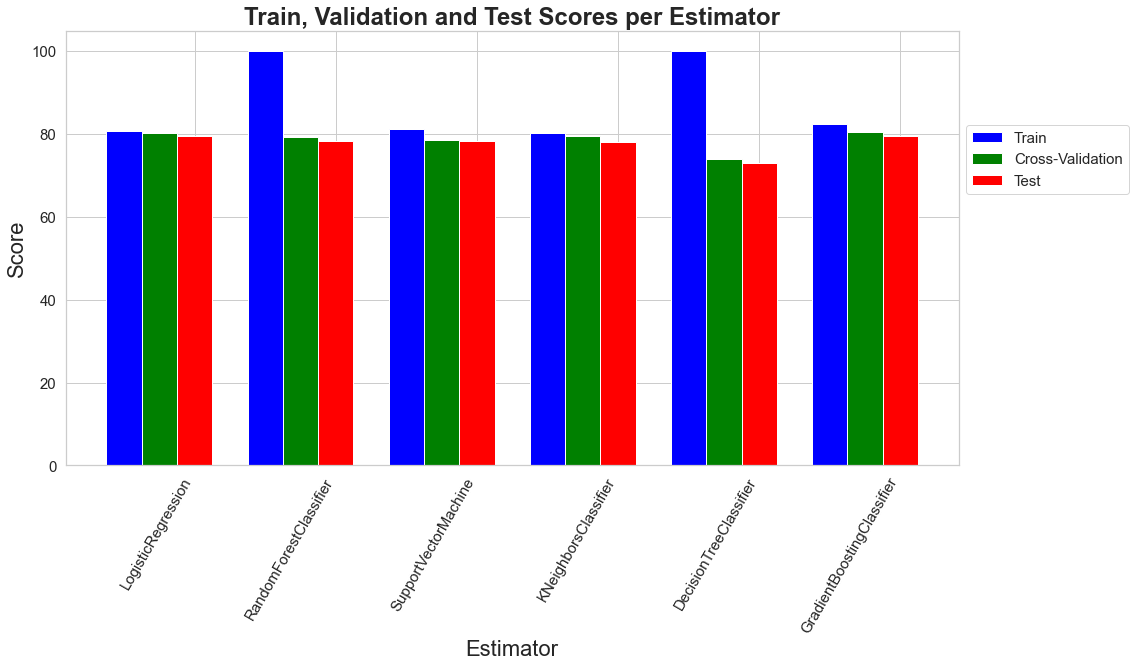

In [247]:
# plotting barchart of train, validation and test scores

bars1 = train_scores
bars2 = cross_val_scores
bars3 = test_scores

bar_width = 0.25
xticks = list(pipe_dict.values())
label_loc = np.arange(len(xticks))

# plotting individual bars
fig, ax = plt.subplots(figsize=(16,8))
plt_bar1 = ax.bar(label_loc, train_scores, bar_width, color='blue')
plt_bar2 = ax.bar(label_loc + 0.25, cross_val_scores, bar_width, color='green')
plt_bar3 = ax.bar(label_loc + 0.5, test_scores, bar_width, color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score', fontsize=22)
ax.set_xlabel('Estimator', fontsize=22)
ax.set_title('Train, Validation and Test Scores per Estimator', fontsize=24, fontweight='bold')
ax.set_xticks(label_loc + (bar_width * 4) / 2)
ax.set_xticklabels(xticks, fontsize=15,rotation = 60, ha="right")
plt.yticks(fontsize=15)

# bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((plt_bar1, plt_bar2, plt_bar3), ('Train', 'Cross-Validation', 'Test'),
          bbox_to_anchor = (1.0, 0.8), fontsize = 15)

plt.tight_layout